# Reading in intial dataset

In [115]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC



train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

df_data = pd.concat([train,test])
df_data[885:895]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
885,886,0.0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0.0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
0,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,NaN,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,NaN,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,NaN,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


## Title Variable Extraction (Only for replacing the age with title median)

In [116]:
df_data["Title"] = df_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

df_data["Title"] = df_data["Title"].replace('Master', 'Master')
df_data["Title"] = df_data["Title"].replace('Mlle', 'Miss')
df_data["Title"] = df_data["Title"].replace(['Mme', 'Dona', 'Ms'], 'Mrs')
df_data["Title"] = df_data["Title"].replace(['Don','Jonkheer'],'Mr')
df_data["Title"] = df_data["Title"].replace(['Capt','Rev','Major', 'Col','Dr'], 'Millitary')
df_data["Title"] = df_data["Title"].replace(['Lady', 'Countess','Sir'], 'Honor')

train["Title"] = df_data['Title'][:891]
test["Title"] = df_data['Title'][891:]

# convert Title categories to Columns
titledummies=pd.get_dummies(train[['Title']], prefix_sep='_') #Title
train = pd.concat([train, titledummies], axis=1) 
ttitledummies=pd.get_dummies(test[['Title']], prefix_sep='_') #Title
test = pd.concat([test, ttitledummies], axis=1) 

print(train.columns,test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Title_Honor',
       'Title_Master', 'Title_Millitary', 'Title_Miss', 'Title_Mr',
       'Title_Mrs'],
      dtype='object') Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Title', 'Title_Master',
       'Title_Millitary', 'Title_Miss', 'Title_Mr', 'Title_Mrs'],
      dtype='object')


## Missing Values

In [117]:
# TRAIN

na_counts = {col: train[col].isna().sum() for col in train}

na_table = pd.DataFrame.from_dict(na_counts, orient='index', columns=['NA_Count'])

print(na_table)

# TEST

na_counts2 = {col: test[col].isna().sum() for col in test}

na_table2 = pd.DataFrame.from_dict(na_counts2, orient='index', columns=['NA_Count'])

print(na_table2)

                 NA_Count
PassengerId             0
Survived                0
Pclass                  0
Name                    0
Sex                     0
Age                   177
SibSp                   0
Parch                   0
Ticket                  0
Fare                    0
Cabin                 687
Embarked                2
Title                   0
Title_Honor             0
Title_Master            0
Title_Millitary         0
Title_Miss              0
Title_Mr                0
Title_Mrs               0
                 NA_Count
PassengerId             0
Pclass                  0
Name                    0
Sex                     0
Age                    86
SibSp                   0
Parch                   0
Ticket                  0
Fare                    1
Cabin                 327
Embarked                0
Title                   0
Title_Master            0
Title_Millitary         0
Title_Miss              0
Title_Mr                0
Title_Mrs               0


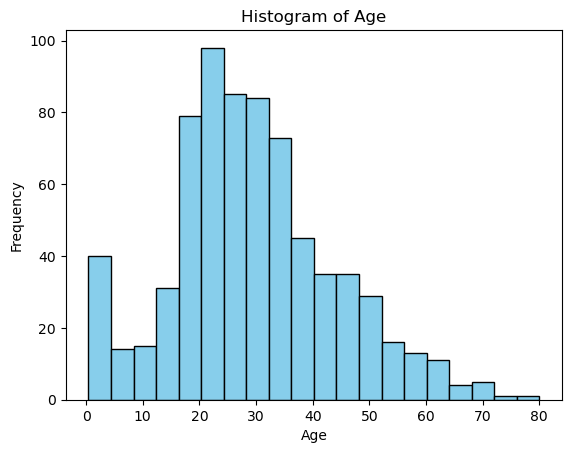

In [118]:
plt.hist(train['Age'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Show plot
plt.show()

### Replacing NA's

#### AGE by mean (Ignore)

In [206]:
#df_data["Age"] = train["Age"].fillna(round(train["Age"].mean())) # Try dropping null age rows instead of imputing the mean


#plt.hist(train['Age'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
#plt.xlabel('Age')
#plt.ylabel('Frequency')
#plt.title('Histogram of Age')

# Show plot
#plt.show()

#### Age by title median

Title:Master, Median:4.0
Title:Miss, Median:22.0
Title:Mr, Median:29.0
Title:Mrs, Median:35.0
Title:Millitary, Median:49.5
Title:Honor, Median:48.0
Missing Ages Estimated


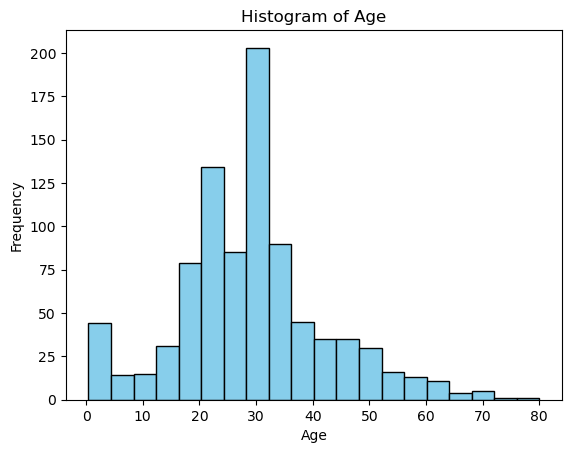

In [119]:
df_data[df_data['Title'] == "Master"]['Age'].describe()

titles = ['Master', 'Miss', 'Mr', 'Mrs', 'Millitary','Honor']
for title in titles:
    age_to_impute = df_data.groupby('Title')['Age'].median()[title]
    print(f'Title:{title}, Median:{age_to_impute}')
    df_data.loc[(df_data['Age'].isnull()) & (df_data['Title'] == title), 'Age'] = age_to_impute
# Age in df_train and df_test:
train["Age"] = df_data['Age'][:891]
test["Age"] = df_data['Age'][891:]
print('Missing Ages Estimated')

plt.hist(train['Age'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Show plot
plt.show()


### Dropping NA's (Ignore)

In [18]:
'''
train = train.dropna(subset = ['Age'])

plt.hist(train['Age'], bins=20, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

# Show plot
plt.show()

train["Age"].describe()
'''

'\ntrain = train.dropna(subset = [\'Age\'])\n\nplt.hist(train[\'Age\'], bins=20, color=\'skyblue\', edgecolor=\'black\')\n\n# Add labels and title\nplt.xlabel(\'Age\')\nplt.ylabel(\'Frequency\')\nplt.title(\'Histogram of Age\')\n\n# Show plot\nplt.show()\n\ntrain["Age"].describe()\n'

## Dummies and Drops

In [120]:
train = pd.get_dummies(train, columns=['Pclass'], prefix=['class'])
test = pd.get_dummies(test, columns=['Pclass'], prefix=['class'])
train[['class_1', 'class_2', 'class_3']] = train[['class_1', 'class_2', 'class_3']].astype(int)
test[['class_1', 'class_2', 'class_3']] = test[['class_1', 'class_2', 'class_3']].astype(int)

train["Sex"] = pd.get_dummies(train[["Sex"]], drop_first = True)
train.rename(columns={'Sex': 'Male'}, inplace=True)
test["Sex"] = pd.get_dummies(test[["Sex"]], drop_first = True)
test.rename(columns={'Sex': 'Male'}, inplace=True)

#train["Embarked"].value_counts()
#train["Embarked"] = train["Embarked"].fillna("S")
#train["Embarked_C"] = pd.get_dummies(train[["Embarked"]])[["Embarked_C"]]
#train["Embarked_S"] = pd.get_dummies(train[["Embarked"]])[["Embarked_S"]]
#train["Embarked_Q"] = pd.get_dummies(train[["Embarked"]])[["Embarked_Q"]]




train = train.drop(["Name", "Ticket", "Embarked", "Cabin"], axis = 1)
train = train.drop(['Title'], axis = 1)

title_list = ['Title_Honor','Title_Master','Title_Millitary','Title_Miss','Title_Mr','Title_Mrs']

train = train.drop(title_list, axis = 1)

test = test.drop(["Name", "Ticket", "Embarked", "Cabin"], axis = 1)
test = test.drop(['Title'], axis = 1)

test_title_list = ['Title_Master','Title_Millitary', 'Title_Miss', 'Title_Mr', 'Title_Mrs']

test = test.drop(test_title_list, axis = 1)

print(train.columns, test.columns)

Index(['PassengerId', 'Survived', 'Male', 'Age', 'SibSp', 'Parch', 'Fare',
       'class_1', 'class_2', 'class_3'],
      dtype='object') Index(['PassengerId', 'Male', 'Age', 'SibSp', 'Parch', 'Fare', 'class_1',
       'class_2', 'class_3'],
      dtype='object')


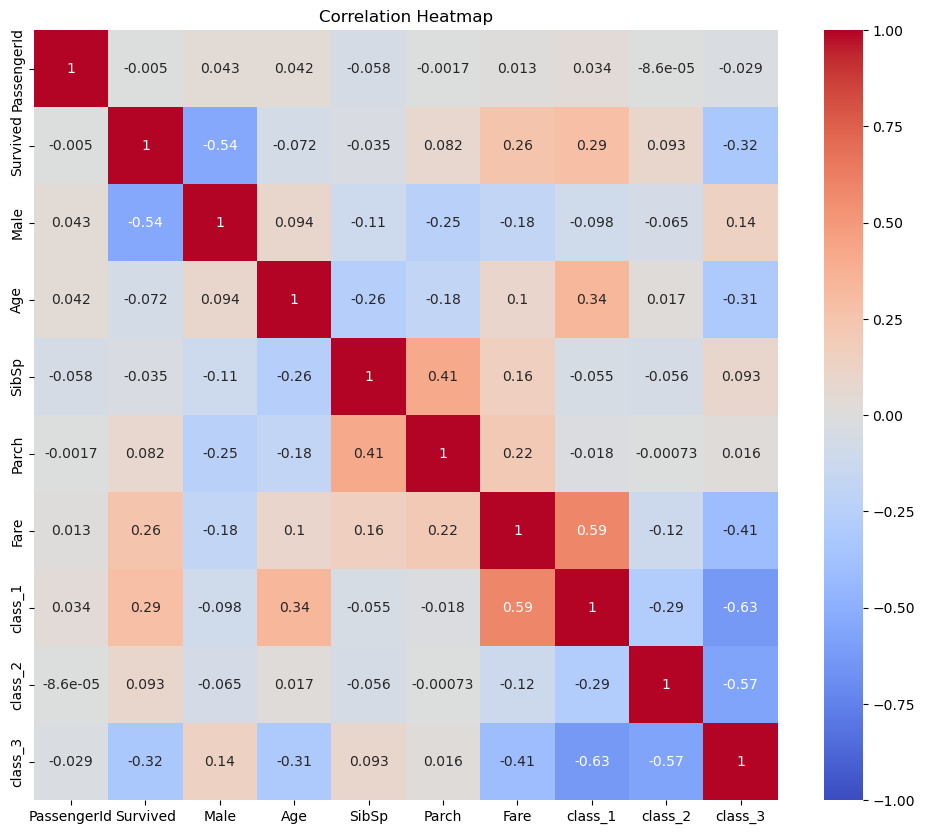

In [75]:
corr_train = train.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_train, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [91]:
test_train = train
test_train['Intercept'] = 1

# Create a DataFrame with only the predictor variables
X = test_train[['Fare', 'class_1','class_2', 'Intercept']]

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)
train = train.drop(columns = ['Intercept'])

    Variable       VIF
0       Fare  1.545820
1    class_1  1.662552
2    class_2  1.095860
3  Intercept  1.931867


It looks like there's not enough evidence of multicollinearity to justify not including either the Fare or the Class Variable in the model.

# x_train, y_train, x_test, y_test

In [92]:
train.columns

Index(['PassengerId', 'Survived', 'Male', 'Age', 'SibSp', 'Parch', 'Fare',
       'class_1', 'class_2', 'class_3'],
      dtype='object')

In [93]:
x_train = train[['Male', 'Age', 'SibSp', 'Parch', 'Fare','class_1', 'class_2', 'class_3']]
y_train = train[['Survived']]

x_test = test[['Male', 'Age', 'SibSp', 'Parch', 'Fare','class_1', 'class_2', 'class_3']]
y_test = gender_submission[['Survived']]

KeyError: "['Male', 'class_1', 'class_2', 'class_3'] not in index"

# Feature Selection

In [80]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

## RF

In [84]:
y_train = np.ravel(y_train)
feat_labels = x_train.columns
forest = RandomForestClassifier(n_estimators = 500,
                               random_state = 1,
                               n_jobs = 2)
forest.fit(x_train,y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    print("2%d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

21) Fare                           0.290995
22) Age                            0.269113
23) Male                           0.259165
24) class_3                        0.051100
25) SibSp                          0.047188
26) Parch                          0.035790
27) class_1                        0.031708
28) class_2                        0.014941


Obviously Fare, Age and Sex are the most important, but I wonder how deleting SibSp and ParCh would impact the model. Intuitively, I could see how having siblings or spouses / parents or children could impact the model, but I'm not sure how. I think for safety and to avoid too many model variables, removing them from the model would be ideal.

## PCA (Work in Progress)

In [52]:
'''
def PCA()

pca = PCA()
x_train_pca = pca.fit_transform(x_train)
pca.explained_variance_ratio_

plt.bar(range(0, 15), pca.explained_variance_ratio_, align='center',label='Individual explained variance')
plt.step(range(0, 15), np.cumsum(pca.explained_variance_ratio_), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')

plt.show()'''

NameError: name 'x_train' is not defined

# Train + Eval function

In [82]:
model_accuracy_titanic_compare = {}

def train_eval(mod, scaler, x_train_features, y_train_labels, x_test_features, y_test_labels):
    x_train_scaled = scaler.fit_transform(x_train_features)
    x_test_scaled = scaler.fit(x_test_features)
    
    model.fit(x_train_scaled, y_train_labels)
    y_predict = model.predict(x_test_scaled)
    
    accuracy = accuracy_score(y_test_labels, y_predict)
    
    model_key = f"{model.__class__.__name__} - {scaler.__class.__name__}"
    model_accuracy_titanic_compare[model_key] = accuracy
    
    return accuracy

# Data Scaling Init

In [50]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()

# Models (1 model for each scaler function)

## Logistic Regression

In [ ]:
# Initialize Models
lr_mod = LogisticRegression()
lr_mod2 = LogisticRegression()
lr_mod3 = LogisticRegression()

# Train and Evaluate models

train_eval(lr_mod, )

### SBS + LR (work in progress)

In [65]:
'''
sbs = SequentialFeatureSelector(lr, n_features_to_select = 8)
sbs.fit(x_train_std, y_train)

print(x_train.columns[list(np.where(sbs.get_support())[0])])

x_train_sbs = x_train_std[:,list(np.where(sbs.get_support())[0])]

lr_sbs = LogisticRegression(C = 100, solver = 'lbfgs', multi_class = 'multinomial')
lr_sbs.fit(x_train_sbs,y_train)

y_pred = lr_sbs.predict(x_test_std[:,list(np.where(sbs.get_support())[0])])

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore: {highscore.round(3)}")
else:
    print("Score = Highscore")
    '''

'\nsbs = SequentialFeatureSelector(lr, n_features_to_select = 8)\nsbs.fit(x_train_std, y_train)\n\nprint(x_train.columns[list(np.where(sbs.get_support())[0])])\n\nx_train_sbs = x_train_std[:,list(np.where(sbs.get_support())[0])]\n\nlr_sbs = LogisticRegression(C = 100, solver = \'lbfgs\', multi_class = \'multinomial\')\nlr_sbs.fit(x_train_sbs,y_train)\n\ny_pred = lr_sbs.predict(x_test_std[:,list(np.where(sbs.get_support())[0])])\n\nprint("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))\nif highscore > accuracy_score(y_test,y_pred):\n    print(f"Highscore: {highscore.round(3)}")\nelif highscore < accuracy_score(y_test,y_pred):\n    highscore = accuracy_score(y_test,y_pred)\n    print(f"New Highscore: {highscore.round(3)}")\nelse:\n    print("Score = Highscore")\n    '

Interesting that the accuracy went down a little bit after feature selection

In [54]:
'''sbs2 = SequentialFeatureSelector(lr, n_features_to_select = 5)
sbs2.fit(x_train_std, y_train)

print(x_train.columns[list(np.where(sbs2.get_support())[0])])

x_train_sbs2 = x_train_std[:,list(np.where(sbs2.get_support())[0])]

lr_sbs2 = LogisticRegression(C = 100, solver = 'lbfgs', multi_class = 'multinomial')
lr_sbs2.fit(x_train_sbs2,y_train)

y_pred = lr_sbs2.predict(x_test_std[:,list(np.where(sbs2.get_support())[0])])

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore: {highscore.round(3)}")
else:
    print("Score = Highscore")'''

Index(['Male', 'SibSp', 'Parch', 'Title_Master', 'class_3'], dtype='object')
Accuracy: 0.825
Highscore: 0.869


### LR with PCA (with titles)

#### n_components = 2

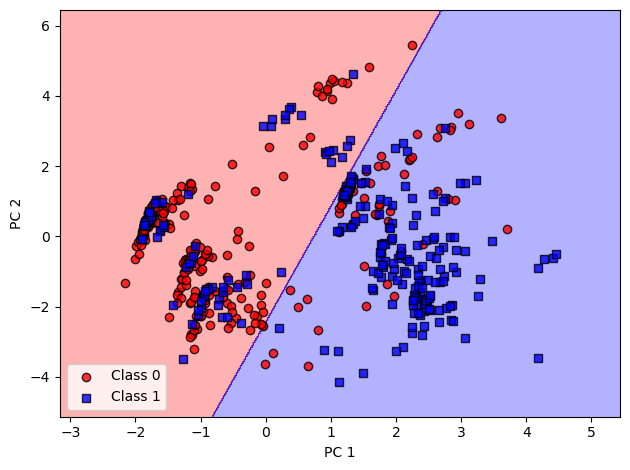

In [32]:
'''# TRAINING + PLOT


pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

lr = LogisticRegression(C = 100, solver = 'lbfgs', multi_class = 'multinomial')
lr = lr.fit(x_train_pca, y_train)

plot_decision_regions(x_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()'''

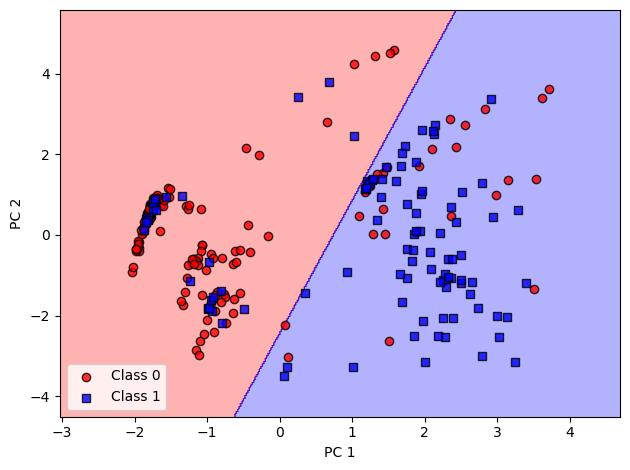

Accuracy: 0.799
Highscore: 0.832


In [33]:
'''# TEST + PLOT
plot_decision_regions(x_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('figures/05_05.png', dpi=300)
plt.show()

y_pred = lr.predict(x_test_pca)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore!: {highscore.round(3)}")
else:
    print("Score = Highscore")'''

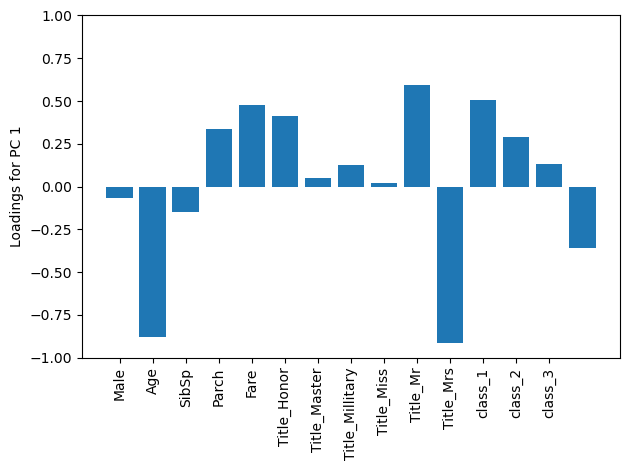

In [34]:
'''sklearn_loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig, ax = plt.subplots()

ax.bar(range(15), sklearn_loadings[:, 0], align='center')
ax.set_ylabel('Loadings for PC 1')
ax.set_xticks(range(14))
ax.set_xticklabels(x_train.columns[1:], rotation=90)

plt.ylim([-1, 1])
plt.tight_layout()
plt.show()'''

Definitely looks like there's a relationship there that's not being captured, and the classifier is only 80% accurate on the test case.

#### n_components = 3,4,5

In [35]:
'''# N = 3

pca = PCA(n_components=3)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

lr = LogisticRegression(C = 100, solver = 'lbfgs', multi_class = 'multinomial',random_state = 1)
lr = lr.fit(x_train_pca, y_train)

y_pred = lr.predict(x_test_pca)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore!: {highscore.round(3)}")
else:
    print("Score = Highscore")'''

Accuracy: 0.795
Highscore: 0.832


In [36]:
'''# N = 4

pca = PCA(n_components=4)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

lr = LogisticRegression(C = 100, solver = 'lbfgs', multi_class = 'multinomial', random_state = 1)
lr = lr.fit(x_train_pca, y_train)

y_pred = lr.predict(x_test_pca)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore!: {highscore.round(3)}")
else:
    print("Score = Highscore")'''

Accuracy: 0.795
Highscore: 0.832


In [37]:
'''pca = PCA(n_components=5)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

lr = LogisticRegression(C = 100, solver = 'lbfgs', multi_class = 'multinomial', random_state = 1)
lr = lr.fit(x_train_pca, y_train)

y_pred = lr.predict(x_test_pca)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore!: {highscore.round(3)}")
else:
    print("Score = Highscore")'''

Accuracy: 0.795
Highscore: 0.832


## RF

In [68]:
#Initialize RF models

rf_mod = RandomForestClassifier(n_estimators = 100)
rf_mod2 = RandomForestClassifier(n_estimators = 100)
rf_mod3 = RandomForestClassifier(n_estimators = 100)

### First RF

In [42]:
'''forest = RandomForestClassifier(n_estimators = 25,
                               random_state=1,
                               n_jobs = 2)
forest.fit(x_train_std,y_train)
y_pred = forest.predict(x_test_std)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore!: {highscore.round(3)}")
else:
    print("Score = Highscore")'''

Accuracy: 0.843
New Highscore!: 0.843


#### RF parameter iteration

In [55]:
'''forest = RandomForestClassifier(n_estimators = 29,
                               random_state=1,
                               n_jobs = 2,
                               max_depth = None,
                               min_samples_split = 10,
                               min_samples_leaf = 1,
                               max_leaf_nodes = 46)
forest.fit(x_train_std,y_train)
y_pred = forest.predict(x_test_std)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore!: {highscore.round(3)}")
else:
    print("Score = Highscore")'''

Accuracy: 0.869
Score = Highscore


In [44]:
'''score_list = []
for i in list(range(2, 100)):
    forest = RandomForestClassifier(n_estimators = 77,
                               random_state=1,
                                   min_samples_split = 8,
                                   max_leaf_nodes = 46)
    forest.fit(x_train,y_train)
    y_pred = forest.predict(x_test)
    score_list.append([accuracy_score(y_test,y_pred), f"max_depth = {i}"])
    

max(score_list)'''

KeyboardInterrupt: 

#### Grid Search (Work In Progress (WIP))

Grid searching takes a really long time

In [279]:
'''
rf = RandomForestClassifier(random_state = 1)

param_grid = {
    'n_estimators': [i for i in range(26,32)],
    'min_samples_split': [i for i in range(7,13)],
    'max_leaf_nodes': [i for i in range(43,49)],
    'random_state': [1]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

y_pred = grid_search.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print("Best Parameters:", best_params)
print("Accuracy:", accuracy)'''

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'max_leaf_nodes': 48, 'min_samples_split': 8, 'n_estimators': 26, 'random_state': 1}
Accuracy: 0.8395522388059702


## KNN

In [67]:
knn_mod = KNeighborsClassifier(n_neighbors = 5)
knn_mod2 = KNeighborsClassifier(n_neighbors = 5)
knn_mod3 = KNeighborsClassifier(n_neighbors = 5)

In [45]:
'''
knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = 'minkowski')
knn.fit(x_train,y_train)

y_pred = knn.predict(x_test)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore!: {highscore.round(3)}")
else:
    print("Score = Highscore")'''

'''knn = KNeighborsClassifier(n_neighbors = 5, p = 2, metric = 'minkowski')
knn.fit(x_train_select,y_train)

y_pred = knn.predict(x_test_select)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore!: {highscore.round(3)}")
else:
    print("Score = Highscore")'''

Accuracy: 0.657
Highscore: 0.869


## SVM

### Linear

In [ ]:
mod_svm = svm.SVC(kernel='linear', C=1)
mod_svm2 = svm.SVC(kernel='linear', C=1)
mod_svm3 = svm.SVC(kernel='linear', C=1)

### Non-Linear with Kernel

In [ ]:
mod_svm_nonlin = SVC(kernel = "rbf", C = 1, random_state = 1, gamma = 0.1)
mod_svm_nonlin2 = SVC(kernel = "rbf", C = 1, random_state = 1, gamma = 0.1)
mod_svm_nonlin3 = SVC(kernel = "rbf", C = 1, random_state = 1, gamma = 0.1)

In [51]:
'''svm = SVC(kernel = "rbf", C = 10, random_state = 1, gamma = 0.1) #probably not needed, but lets see what happens
svm.fit(x_train_std, y_train)

y_pred = svm.predict(x_test_std)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore!: {highscore.round(3)}")
else:
    print("Score = Highscore")
    
svm = SVC(kernel = "rbf", C = 10, random_state = 1, gamma = 0.2) #probably not needed, but lets see what happens
svm.fit(x_train_std, y_train)

y_pred = svm.predict(x_test_std)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore!: {highscore.round(3)}")
else:
    print("Score = Highscore")

svm = SVC(kernel = "rbf", C = 10, random_state = 1, gamma = 0.6) #probably not needed, but lets see what happens
svm.fit(x_train_std, y_train)

y_pred = svm.predict(x_test_std)

print("Accuracy: %0.3f" % accuracy_score(y_test,y_pred))
if highscore > accuracy_score(y_test,y_pred):
    print(f"Highscore: {highscore.round(3)}")
elif highscore < accuracy_score(y_test,y_pred):
    highscore = accuracy_score(y_test,y_pred)
    print(f"New Highscore!: {highscore.round(3)}")
else:
    print("Score = Highscore")'''

Accuracy: 0.802
Highscore: 0.869


## Neural Networks

Graph everything, matplot.pyplot, seaborn